In [ ]:
#Pyswarm installation
pip install --upgrade pyswarm

In [116]:
#Initialization of modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize
import random
from pyswarm import pso

In [118]:
#Data generation
x = np.array([3*k/1000 for k in range(1001)])
f = np.array([1/(x[k]**2 -3*x[k]+2) for k in range(1001)])
y=np.array([])
for i in range(1001):
  if (f[i]<-100):
    y=np.append(y,[-100+np.random.standard_normal(1)])
  elif (f[i]>100):
    y=np.append(y,[100+np.random.standard_normal(1)])
  else:
    y=np.append(y,[f[i]+np.random.standard_normal(1)])

In [119]:
#sum of squared residuals
def D(a,b,c,d):
  summa=0
  for i in range(1001):
    summa=summa+((a*x[i]+b)/(x[i]**2+c*x[i]+d)-y[i])**2
  return summa

In [120]:
#sum of squared residuals for scipy methods
def D_NM(params):
  a,b,c,d=params[0],params[1],params[2],params[3]
  summa=0
  for i in range(1001):
    summa=summa+(((a*x[i]+b)/(x[i]**2+c*x[i]+d)-y[i])**2)
  return summa

In [121]:
#Nelder Mead
NM=scipy.optimize.minimize(D_NM,np.array([0,0,0,0]),args=(), method='Nelder-Mead',options={'xatol': 0.001,'disp': True})
print(NM.x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


Optimization terminated successfully.
         Current function value: 261940.438955
         Iterations: 300
         Function evaluations: 525
[ 0.04550986 -0.56517313 -3.03337223  2.38223489]


In [122]:
#function which outputs a list of function values calculated in all x points for Levenberg-Marquardt
def D_lm(params):
  a,b,c,d=params
  return (a*x+b)/(x**2+c*x+d)

In [127]:
#Levenberg-Marquardt
lm = scipy.optimize.least_squares(D_lm, [1,1,1,1], method="lm", xtol=1e-3)
print(D_NM(lm.x))

1001
4
4004
267441.13679544686


In [130]:
lm

 active_mask: array([0, 0, 0, 0])
        cost: 2.41978064432904e-30
         fun: array([-1.98314669e-16, -1.97574574e-16, -1.96835385e-16, ...,
       -4.09111245e-18, -4.07328398e-18, -4.05550741e-18])
        grad: array([-1.13242026e-14, -2.71746742e-14, -8.96169695e-31, -3.46539793e-30])
         jac: array([[0.00000000e+00, 1.00000002e+00, 0.00000000e+00, 1.98314673e-16],
       [2.99100013e-03, 9.97000044e-01, 5.90945577e-19, 1.96981859e-16],
       [5.96400139e-03, 9.94000232e-01, 1.17392651e-18, 1.95654418e-16],
       ...,
       [2.31053533e-01, 7.71721888e-02, 9.45265987e-19, 3.15720102e-19],
       [2.30911312e-01, 7.70474849e-02, 9.40567348e-19, 3.13836286e-19],
       [2.30769231e-01, 7.69230769e-02, 9.35886325e-19, 3.11962108e-19]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 11
        njev: None
  optimality: 2.717467415701781e-14
      status: 3
     success: True
           x: array([ 4.85310232e-17, -1.98314666e-16,  1.00000000e+00,  9

In [128]:
#Simulated Annealing
sa= scipy.optimize.dual_annealing(D_NM,[(-5,5),(-5,5),(-5,5),(-5,5)],seed=1)

In [129]:
sa

     fun: 136273.43450802114
 message: ['Maximum number of iteration reached']
    nfev: 8956
    nhev: 0
     nit: 1000
    njev: 0
  status: 0
 success: True
       x: array([-0.99914628,  0.99963714, -2.0009232 ,  1.00093929])

In [131]:
#Patricle Swarm Optimization
lower = np.array([-1,-1,-1,-1]) 
upper = np.array([1,1,1,1])
swarm= pso(D_NM, lb, ub, maxiter=1000, swarmsize=1000, minfunc=0.001)

Stopping search: Swarm best objective change less than 0.001


In [134]:
swarm

(array([-0.65254616,  0.24904743, -0.40348262, -0.59731128]),
 197332.2874377983)

In [135]:
#Differential Evolution method
bounds = np.array([[-5, 5], [-5, 5], [-5, 5], [-5, 5]])
de = scipy.optimize.differential_evolution(D_NM, bounds, tol=0.001)

In [136]:
de

     fun: 136277.78390247075
     jac: array([-12670.13140023, -13676.87946185, 664835.36793385, 681775.46781953])
 message: 'Optimization terminated successfully.'
    nfev: 8785
     nit: 144
 success: True
       x: array([-0.99088488,  0.99137372, -2.00093499,  1.00095081])

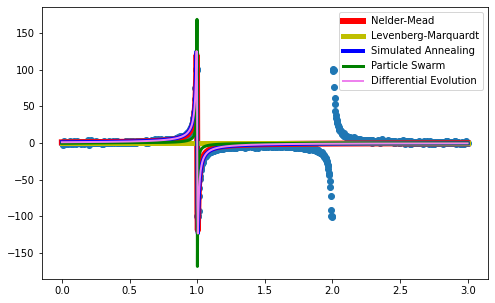

In [137]:
#Data visualization
plt.figure(figsize=(8,5))
plt.plot(x, (result.x[0]*x+result.x[1])/(x**2+result.x[2]*x+result.x[3]), 'r',label='Nelder-Mead',linewidth=6)
plt.plot(x, (lm.x[0]*x+lm.x[1])/(x**2+lm.x[2]*x+lm.x[3]), 'y', label='Levenberg-Marquardt',linewidth=5)
plt.plot(x, (sa.x[0]*x+sa.x[1])/(x**2+sa.x[2]*x+sa.x[3]), 'b', label='Simulated Annealing',linewidth=4)
plt.plot(x, (swarm[0][0]*x+swarm[0][1])/(x**2+swarm[0][2]*x+swarm[0][3]), 'g',label='Particle Swarm',linewidth=3)
plt.plot(x, (de.x[0]*x+de.x[1])/(x**2+de.x[2]*x+de.x[3]), 'violet',label='Differential Evolution',linewidth=2)
plt.scatter(x,y)
plt.legend()

In [138]:
#coordinate input
coordinates=np.array([
[0.549963E-07, 0.985808E-08],
[-28.8733, -0.797739E-07],
[-79.2916, -21.4033],
[-14.6577, -43.3896],
[-64.7473, 21.8982],
[-29.0585, -43.2167],
[-72.0785, 0.181581],
[-36.0366, -21.6135],
[-50.4808, 7.37447],
[-50.5859, -21.5882],
[-0.135819, -28.7293],
[-65.0866, -36.0625],
[-21.4983, 7.31942],
[-57.5687, -43.2506],
[-43.0700, 14.5548]])

In [139]:
#euclidean distance function
def dist(x1,x2):
  return np.sqrt((x1[0]-x2[0])**2+(x1[1]-x2[1])**2)

In [140]:
#calculation of distance matrix
matrix=np.array([np.zeros(15),np.zeros(15),np.zeros(15),np.zeros(15),np.zeros(15),np.zeros(15),np.zeros(15),np.zeros(15),np.zeros(15),np.zeros(15),np.zeros(15),np.zeros(15),np.zeros(15),np.zeros(15),np.zeros(15)])
for i in range(15):
  for j in range(15):
    matrix[i][j]=dist(coordinates[i],coordinates[j])

In [141]:
#initial approximation
a0=np.array([i for i in range(15)])

In [142]:
#cost function: total distance
def cost(a):
  summa=0
  for i in range(1,a.size):
    summa=summa+matrix[a[i-1]][a[i]]
  return summa

In [143]:
#x and y coordinates of cities
x=np.array([coordinates[i][0] for i in range (15)])
y=np.array([coordinates[i][1] for i in range (15)])

In [150]:
#Simulated Annealing for TSP solving
a=a0
c=cost(a0)
T=100
iter=0
while(cost(a)>350):
  l=random.randint(0,14)
  r=random.randint(l,15)
  trans=random.randint(0,2)
  if (trans==0):
    sub=a[l:r]
    sub_rev=np.flip(a[l:r])
    a=np.delete(a,range(l,r))
    a=np.insert(a,l,sub_rev)
    if(cost(a)>c):
      p=np.exp(-(cost(a)-c)/T)
      value=random.uniform(0,1)
      if (value>p):
        a=np.delete(a,range(l,r))
        a=np.insert(a,l,sub)
      else:
        c=cost(a)
  if (trans==1):
    sub=a[l:r]
    reserve=np.array([a[i] for i in range(a.size)])
    a=np.delete(a,range(l,r))
    q=random.randint(0,a.size)
    a=np.insert(a,q,sub)
    if(cost(a)>c):
      p=np.exp(-(cost(a)-c)/T)
      value=random.uniform(0,1)
      if (value>p):
        a=reserve
      else:
        c=cost(a)
  if (iter==0):
    first=a
    first_cost=c
  iter=iter+1
  T=T*0.99

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()


680.8535911480834


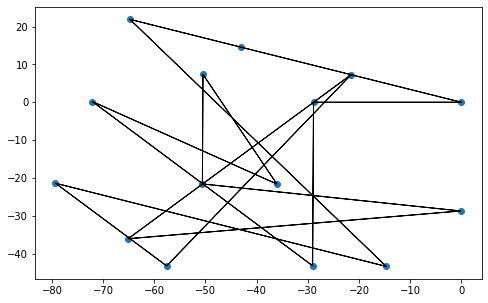

In [151]:
#path visualization on the first iteration
plt.figure(figsize=(8,5))
plt.scatter(x,y)
for i in range(14):
    plt.arrow(coordinates[first[i]][0],coordinates[first[i]][1],coordinates[first[i+1]][0]-coordinates[first[i]][0],coordinates[first[i+1]][1]-coordinates[first[i]][1])
plt.arrow(coordinates[first[14]][0],coordinates[first[14]][1],coordinates[first[0]][0]-coordinates[first[14]][0],coordinates[first[0]][1]-coordinates[first[14]][1])
print(cost(first))

339.76549093119183


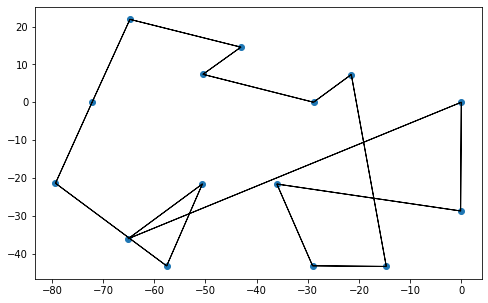

In [152]:
#path visualization for last iteration
plt.figure(figsize=(8,5))
plt.scatter(x,y)
for i in range(14):
    plt.arrow(coordinates[a[i]][0],coordinates[a[i]][1],coordinates[a[i+1]][0]-coordinates[a[i]][0],coordinates[a[i+1]][1]-coordinates[a[i]][1])
plt.arrow(coordinates[a[14]][0],coordinates[a[14]][1],coordinates[a[0]][0]-coordinates[a[14]][0],coordinates[a[0]][1]-coordinates[a[14]][1])
print(cost(a))